## t-SNE 多様体学習

高次元データの各データポイントの類似度を距離として計算し、2次元(または3次元)空間に配置したランダムな点に距離を元にして配置していく。

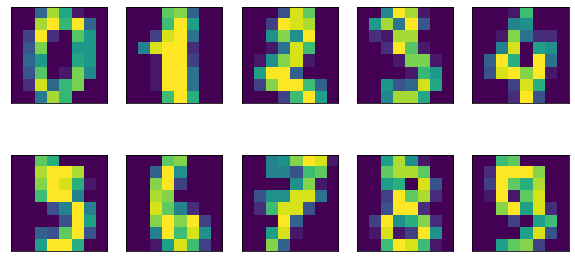

In [9]:
from sklearn.datasets import load_digits
import mglearn
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

digits  = load_digits()

fig, axes = plt.subplots(2, 5, figsize=(10,5), subplot_kw={"xticks":(), "yticks":()})
for ax, img in zip(axes.ravel(), digits.images):
    ax.imshow(img)

### PCAで成分を可視化

Text(0, 0.5, 'Second principal component')

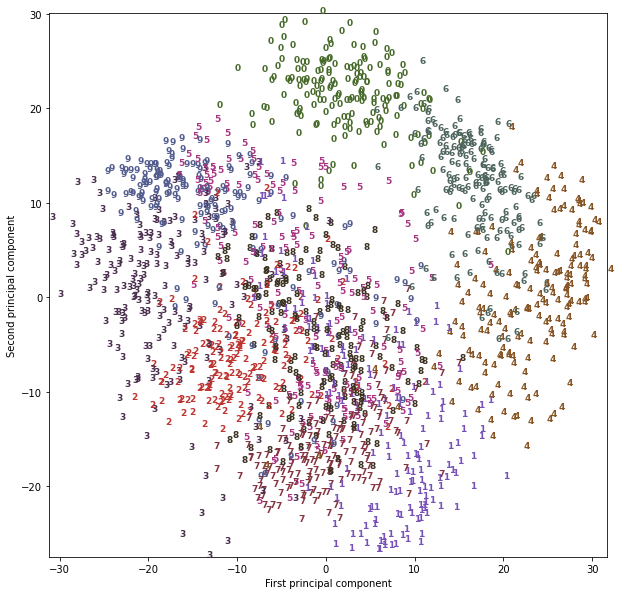

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(digits.data)
digits_pca = pca.transform(digits.data)
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", 
          "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
plt.figure(figsize=(10,10))
plt.xlim(digits_pca[:,0].min(), digits_pca[:,0].max())
plt.ylim(digits_pca[:,1].min(), digits_pca[:,1].max())

for i in range(len(digits.data)):
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), 
             color=colors[digits.target[i]], fontdict={"weight":"bold", "size":9})
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

### TSNEで成分を可視化

Text(0, 0.5, 't-SNE feature 1')

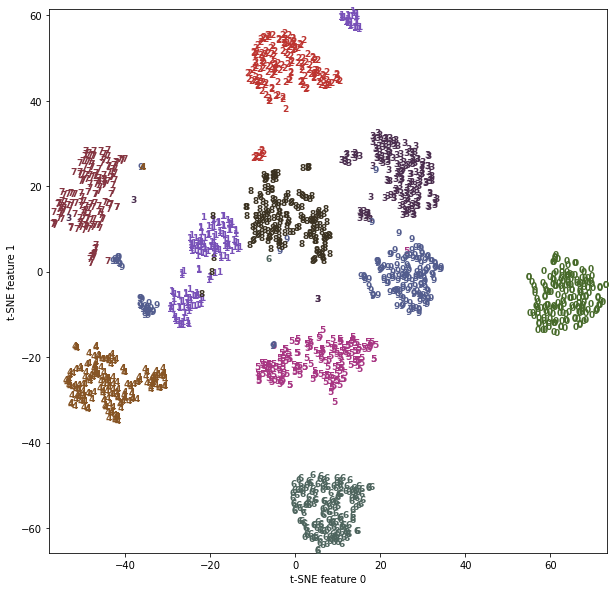

In [8]:
from sklearn.manifold import TSNE

tsne = TSNE(random_state=42)
digits_tsne = tsne.fit_transform(digits.data)

plt.figure(figsize=(10,10))
plt.xlim(digits_tsne[:,0].min(), digits_tsne[:,0].max()+1)
plt.ylim(digits_tsne[:,1].min(), digits_tsne[:,1].max()+1)

for i in range(len(digits.data)):
    plt.text(digits_tsne[i, 0], digits_tsne[i, 1], str(digits.target[i]), 
             color=colors[digits.target[i]], fontdict={"weight":"bold", "size":9})
plt.xlabel("t-SNE feature 0")
plt.ylabel("t-SNE feature 1")